In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn .model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day30-function-transformer/train.csv'
df = pd.read_csv(url,usecols = ['Age','Fare','Survived'])

In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

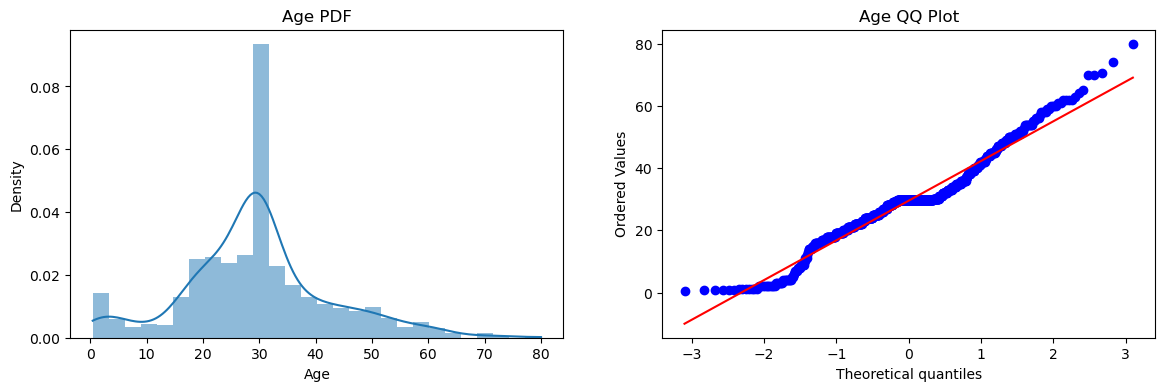

In [9]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.histplot(x_train['Age'],kde = True,stat='density',linewidth=0)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist = 'norm',plot = plt)
plt.title('Age QQ Plot')

plt.show()

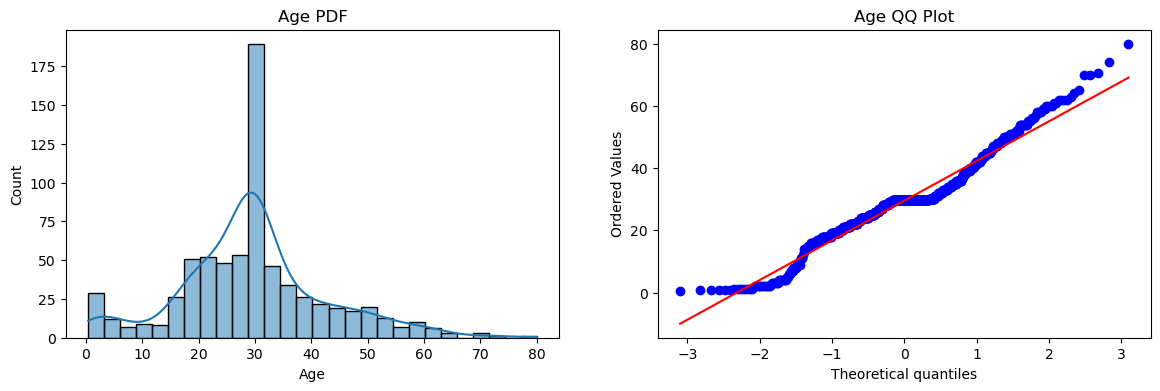

In [10]:

plt.figure(figsize=(14, 4))

# Histogram + KDE
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)
plt.title('Age PDF')

# Q-Q plot
plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()


/var/folders/mp/ktrc96ws30v801fshnxv23mc0000gn/T/ipykernel_4725/1141484227.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


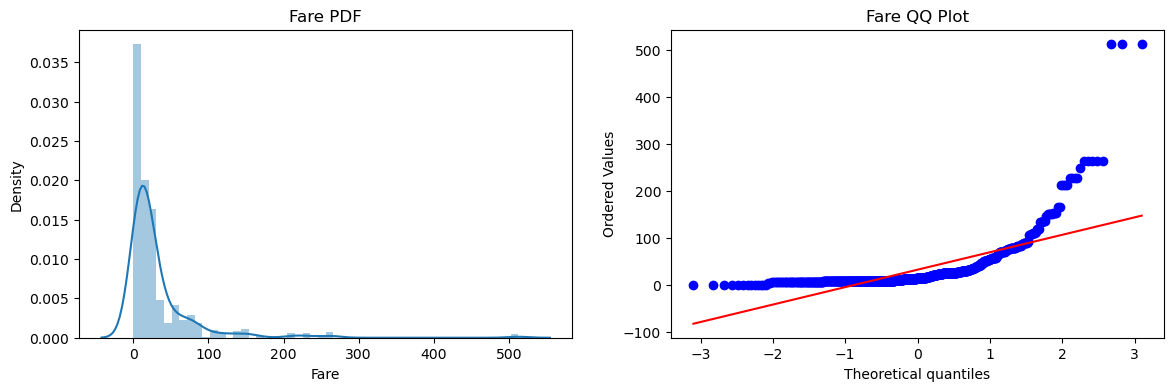

In [11]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist = 'norm',plot = plt)
plt.title('Fare QQ Plot')

plt.show()

In [11]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [12]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6536312849162011


In [13]:
trf = FunctionTransformer(func = np.log1p) #np.log1p - first adds 1 so that once log encountres '0', it doesn't cause problem

In [14]:
x_train_transformed= trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [15]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6927374301675978


In [16]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring = 'accuracy',cv = 10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring = 'accuracy',cv = 10)))

LR 0.678027465667915
DT 0.6644444444444444


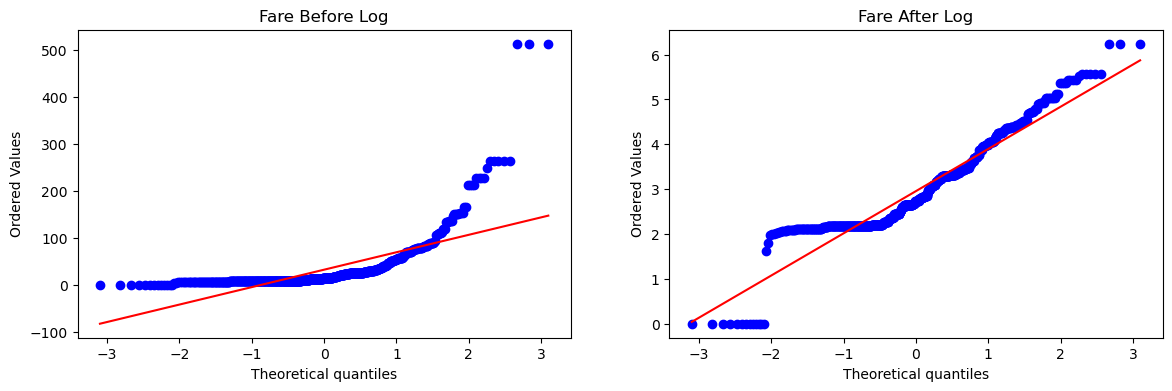

In [17]:
plt.figure(figsize = (14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'],dist = 'norm',plot = plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist = 'norm',plot = plt)
plt.title('Fare After Log')

plt.show()

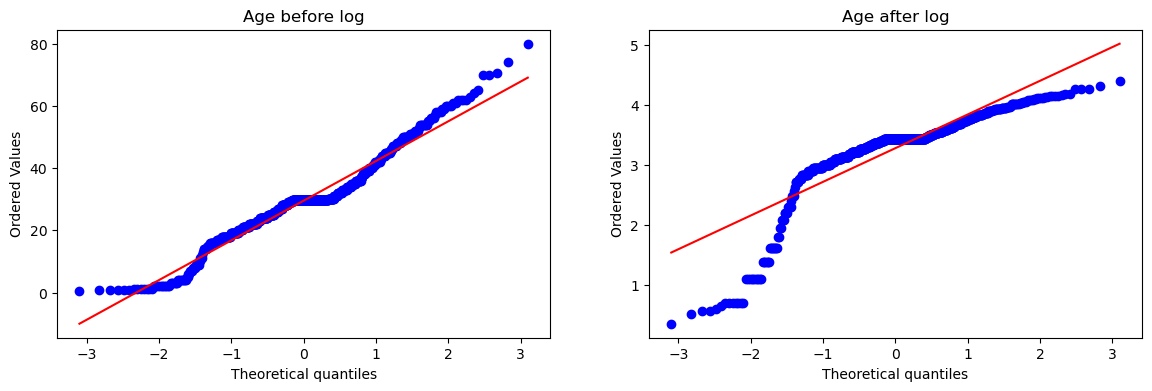

In [18]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'],dist = 'norm',plot = plt)
plt.title('Age before log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist = 'norm',plot = plt)
plt.title('Age after log')

plt.show()

In [19]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder = 'passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

In [20]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2, y_train)
clf2.fit(x_train_transformed2, y_train)

y_pred = clf.predict(x_test_transformed2)
y_pred2= clf2.predict(x_test_transformed2)

In [21]:
print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


In [22]:
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv = 10)))
print('DT',np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv = 10)))

LR 0.6712609238451936
DT 0.6633333333333333


In [23]:
def apply_transform(transform):
    x = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder = 'passthrough')

    x_trans = trf.fit_transform(x)

    clf = LogisticRegression()

    print('Accuracy',np.mean(cross_val_score(clf,x_trans,y,scoring = 'accuracy',cv = 10)))

    plt.figure(figsize = (14,4))

    plt.subplot(121)
    stats.probplot(x['Fare'],dist= 'norm',plot = plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(x_trans[:,0],dist = 'norm',plot = plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6431335830212235


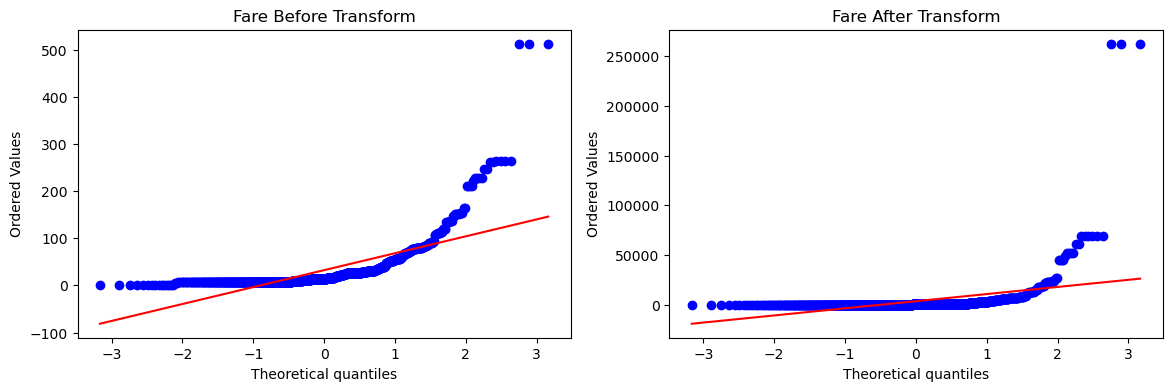

In [29]:
apply_transform(lambda x: x**2) #gives x and returns x**1/2